In [8]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

svc_clf = make_pipeline(
    StandardScaler(),
    SVC(C=1, random_state=42)
)

svc_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, random_state=42))])

In [10]:
X_new = [[5.5, 1.7], [5.0, 1.5]]

In [11]:
svc_clf.predict(X_new)

array([ True, False])

In [12]:
svc_clf.decision_function(X_new)

array([ 0.78514827, -0.42868419])

In [13]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    SVC(C=10, max_iter=10_000, random_state=42)
)

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, max_iter=10000, random_state=42))])

In [23]:
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [28]:
X[:5]

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641],
       [-0.72871455,  0.14652347]])

In [30]:
X[:,0]

array([ 1.61383833,  0.08984723,  0.74721047, -1.10174514, -0.72871455,
       -0.65891281,  0.22828266,  1.39439184,  0.87158283,  0.88304472,
        0.38220326, -0.32279169,  1.29900621, -0.63569974,  1.96899387,
        1.21073294,  1.13998191,  1.06805159,  0.49598571, -0.26038715,
       -0.06516219,  1.87005845,  0.03146515, -1.03151461,  0.45814234,
        0.40767679, -0.9379972 ,  2.02675758,  0.73867736,  0.71349755,
        0.92445501, -1.05805492,  1.80904221, -0.17181754,  2.22167197,
        0.8346617 ,  0.28332589,  0.40728969, -0.6303002 ,  0.59525613,
       -0.99578508, -0.45366574,  0.73645602,  2.10042161, -0.26764459,
        0.32384572,  1.59212445,  0.14332957,  0.31249817,  0.51814426,
       -0.22452786,  1.131632  ,  0.3723287 , -0.63902305,  0.82849531,
        1.3506206 ,  1.01195087,  0.35506156, -0.64970203,  1.60190251,
        0.27455847,  1.85601581,  0.12784118, -1.12470228,  0.04738364,
        0.67403854, -1.27201559,  0.79988167,  0.18258616,  2.40

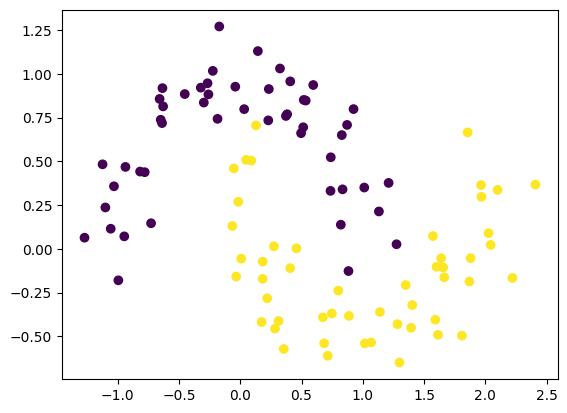

In [35]:
from matplotlib import pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

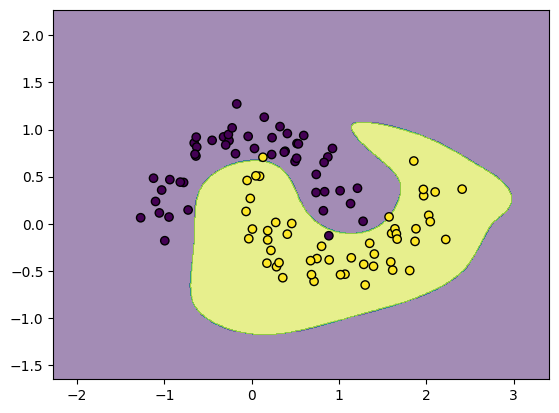

In [56]:
import numpy as np

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.show()

In [57]:
def show_contour_plot(X, y, clf):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.show()

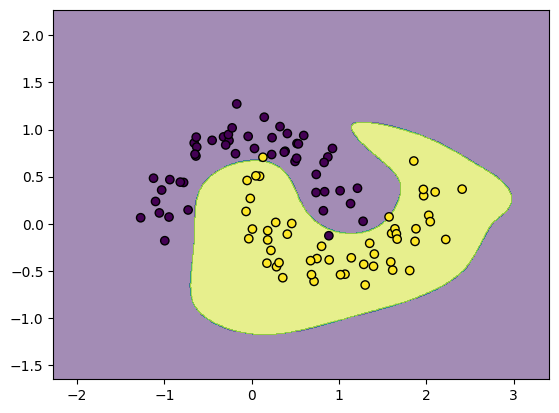

In [58]:
show_contour_plot(X, y, polynomial_svm_clf)

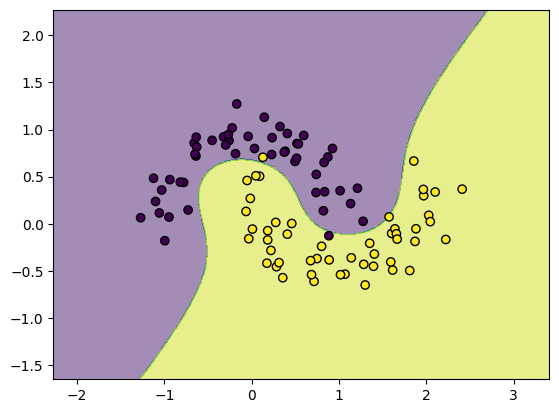

In [59]:
show_contour_plot(X, y, poly_kernel_svm_clf)

In [62]:
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=100, C=100)
)

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, coef0=100, kernel='poly'))])

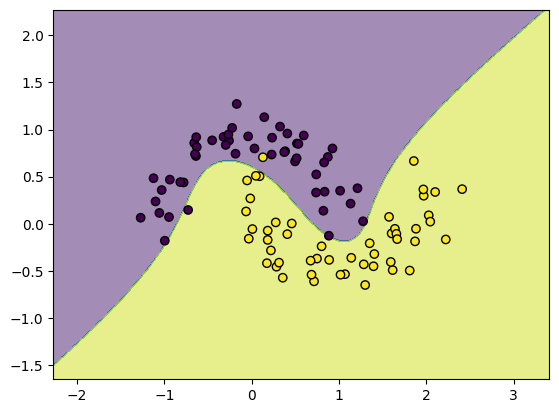

In [63]:
show_contour_plot(X, y, poly_kernel_svm_clf)

In [76]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=0.1, C=1000)
)

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=0.1))])

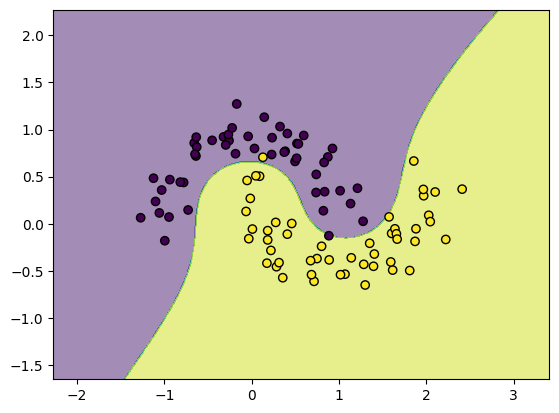

In [77]:
show_contour_plot(X, y, rbf_kernel_svm_clf)

In [78]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=1000)
)

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=5))])

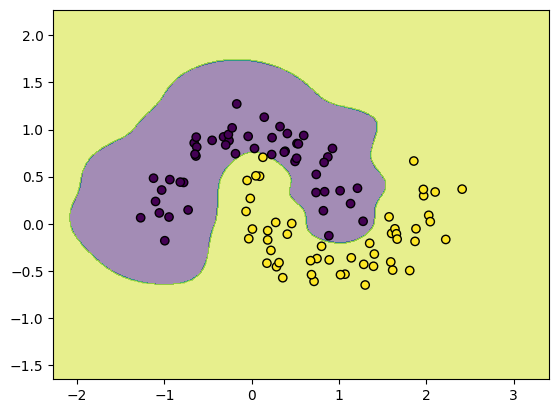

In [79]:
show_contour_plot(X, y, rbf_kernel_svm_clf)